# **Llamar librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# **Llamar base de datos**

In [ ]:
from google.colab import files 
uploaded= files.upload ()

Saving Consumo_de_agua_potable_en_el_casco_urbano_segundo_semestre..csv to Consumo_de_agua_potable_en_el_casco_urbano_segundo_semestre..csv


In [ ]:
data=pd.read_csv("Consumo_de_agua_potable_en_el_casco_urbano_segundo_semestre..csv",delimiter=";")

# **Observar las columnas que tiene la data**

In [ ]:
data.columns

Index(['TIPO', 'ESTRATO ', 'CONSUMO JULIO 2020', 'CONSUMO AGOSTO 2020.',
       'CONSUMO SEPTIEMBRE 2020.', 'CONSUMO OCTUBRE 2020.',
       'CONSUMO NOVIEM 2020.', 'CONSUMO DICIEMBRE 2020.', 'PROMEDIO'],
      dtype='object')

In [ ]:
data

TIPO   ESTRATO   CONSUMO JULIO 2020  CONSUMO AGOSTO 2020.  \
0     RESIDENCIAL  ESTRATO 1                  30                     1   
1     RESIDENCIAL  ESTRATO 2                   0                     0   
2     RESIDENCIAL  ESTRATO 2                  31                    10   
3     RESIDENCIAL  ESTRATO 2                  14                     9   
4     RESIDENCIAL  ESTRATO 2                  39                    22   
...           ...        ...                 ...                   ...   
1574  RESIDENCIAL  ESTRATO 2                  24                    29   
1575  RESIDENCIAL  ESTRATO 2                  20                    22   
1576  RESIDENCIAL  ESTRATO 2                  16                    15   
1577  RESIDENCIAL  ESTRATO 2                  11                    63   
1578  RESIDENCIAL  ESTRATO 2                  19                    25   

      CONSUMO SEPTIEMBRE 2020.  CONSUMO OCTUBRE 2020.  CONSUMO NOVIEM 2020.  \
0                            1                      3                     3   
1                            1                      0                     2   
2                            8                     19                     8   
3                            8                     26                     5   
4                            0                      0                     0   
...                        ...                    ...                   ...   
1574                        24                     26                    41   
1575                        31                     59                    43   
1576                        15                     29                    17   
1577                        11                     13                    19   
1578                        26                     26                    50   

      CONSUMO DICIEMBRE 2020.       PROMEDIO  
0                          23  1.016.666.667  
1                           0            0.5  
2                          46  2.033.333.333  
3                          19           13.5  
4                           6  1.116.666.667  
...                       ...            ...  
1574                       38  3.033.333.333  
1575                      125             50  
1576                       17  1.816.666.667  
1577                       20  2.283.333.333  
1578                       54  3.333.333.333  

[1579 rows x 9 columns]

# **Estadistica descriptiva**

In [ ]:
data.describe().T

count       mean        std  min  25%   50%   75%  \
CONSUMO JULIO 2020        1579.0  21.015833  35.111344  0.0  7.0  15.0  25.0   
CONSUMO AGOSTO 2020.      1579.0  17.594047  24.679630  0.0  6.0  13.0  22.0   
CONSUMO SEPTIEMBRE 2020.  1579.0  24.462318  36.081450  0.0  8.0  16.0  30.0   
CONSUMO OCTUBRE 2020.     1579.0  24.794174  37.782163  0.0  8.0  18.0  29.0   
CONSUMO NOVIEM 2020.      1579.0  17.495250  32.443777  0.0  2.0  11.0  20.0   
CONSUMO DICIEMBRE 2020.   1579.0  27.051932  41.296416  0.0  8.0  18.0  32.0   

                            max  
CONSUMO JULIO 2020        749.0  
CONSUMO AGOSTO 2020.      380.0  
CONSUMO SEPTIEMBRE 2020.  594.0  
CONSUMO OCTUBRE 2020.     691.0  
CONSUMO NOVIEM 2020.      501.0  
CONSUMO DICIEMBRE 2020.   626.0

# **Histograma**

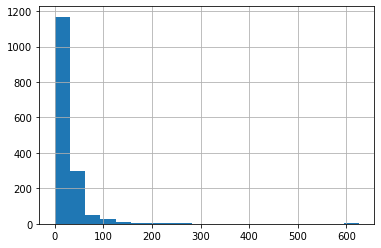

In [ ]:
data["CONSUMO DICIEMBRE 2020."].hist(bins=20)
plt.show()

# **Visualizaciones**

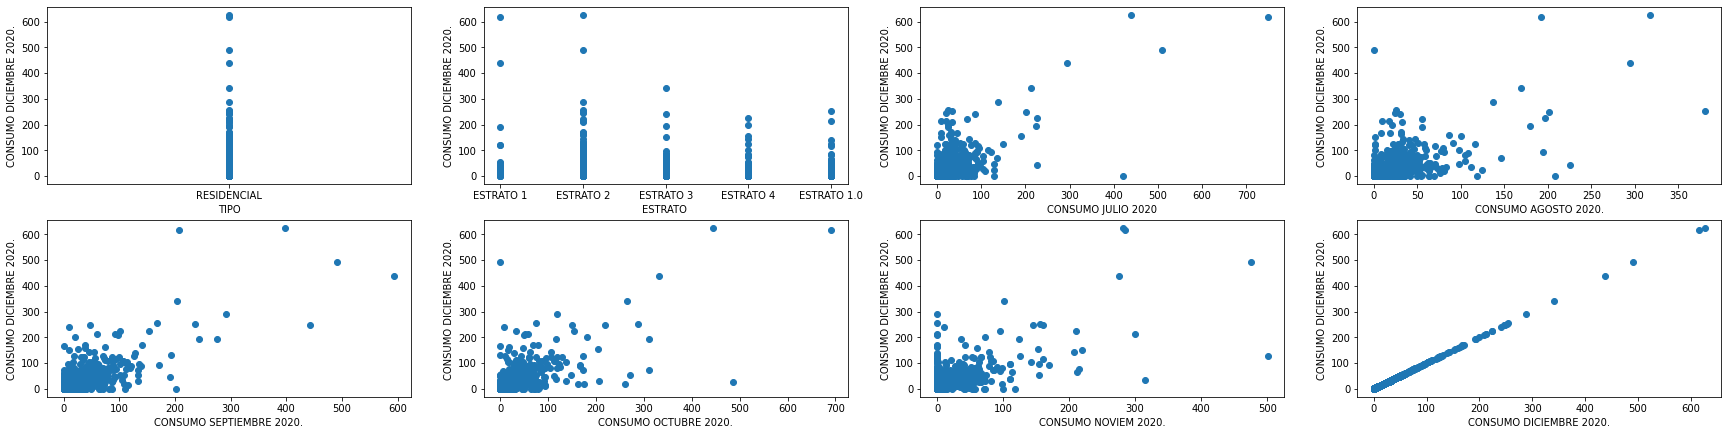

In [ ]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["CONSUMO DICIEMBRE 2020."])
    plt.xlabel(j)
    plt.ylabel("CONSUMO DICIEMBRE 2020.")
plt.show()

# **Regresión sencilla usando statsmodels de python:**

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = data["CONSUMO DICIEMBRE 2020."]   
X = data.drop(columns=["CONSUMO DICIEMBRE 2020.","TIPO","ESTRATO ","PROMEDIO"])
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X

const  CONSUMO JULIO 2020  CONSUMO AGOSTO 2020.  \
0       1.0                  30                     1   
1       1.0                   0                     0   
2       1.0                  31                    10   
3       1.0                  14                     9   
4       1.0                  39                    22   
...     ...                 ...                   ...   
1574    1.0                  24                    29   
1575    1.0                  20                    22   
1576    1.0                  16                    15   
1577    1.0                  11                    63   
1578    1.0                  19                    25   

      CONSUMO SEPTIEMBRE 2020.  CONSUMO OCTUBRE 2020.  CONSUMO NOVIEM 2020.  
0                            1                      3                     3  
1                            1                      0                     2  
2                            8                     19                     8  
3                            8                     26                     5  
4                            0                      0                     0  
...                        ...                    ...                   ...  
1574                        24                     26                    41  
1575                        31                     59                    43  
1576                        15                     29                    17  
1577                        11                     13                    19  
1578                        26                     26                    50  

[1579 rows x 6 columns]

In [ ]:
model_linear = sm.OLS(Y, X).fit()

In [ ]:
predictions_SM = model_linear.predict(X)

In [ ]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CONSUMO DICIEMBRE 2020.   R-squared:                       0.705
Model:                                 OLS   Adj. R-squared:                  0.704
Method:                      Least Squares   F-statistic:                     750.6
Date:                     Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                             15:42:40   Log-Likelihood:                -7152.2
No. Observations:                     1579   AIC:                         1.432e+04
Df Residuals:                         1573   BIC:                         1.435e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9616      0.723      1.330      0.184      -0.456       2.380
CONSUMO JULIO 2020           0.2268      0.025      8.966      0.000       0.177       0.276
CONSUMO AGOSTO 2020.        -0.0469      0.036     -1.307      0.192      -0.117       0.024
CONSUMO SEPTIEMBRE 2020.     0.4668      0.024     19.751      0.000       0.420       0.513
CONSUMO OCTUBRE 2020.        0.2543      0.021     11.882      0.000       0.212       0.296
CONSUMO NOVIEM 2020.         0.2530      0.022     11.432      0.000       0.210       0.296
==============================================================================
Omnibus:                      875.243   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34391.060
Skew:                           1.933   Prob(JB):                         0.00
Kurtosis:                      25.534   Cond. No.                         99.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión lineal sencilla se ajusta con un 70,5%

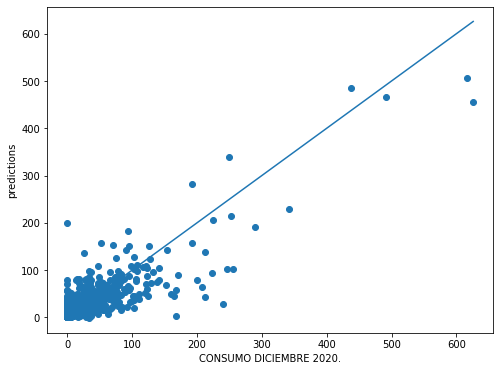

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_SM)
u=np.linspace(data["CONSUMO DICIEMBRE 2020."].min(),data["CONSUMO DICIEMBRE 2020."].max(),5)
plt.plot(u,u)
plt.xlabel("CONSUMO DICIEMBRE 2020.")
plt.ylabel("predictions")
plt.show()

# **Error de predicción**

In [ ]:
rmse=np.sqrt(np.mean((data["CONSUMO DICIEMBRE 2020."]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 22.43571964032225


# **Regresiones lineales con machine learning**

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
features=data.drop(columns=["CONSUMO DICIEMBRE 2020.","TIPO","ESTRATO ","PROMEDIO"])
target=data["CONSUMO DICIEMBRE 2020."]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.00001, random_state = 50)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([45.46601522])

Feature: 0, Score: 0.22687
Feature: 1, Score: -0.04693
Feature: 2, Score: 0.46683
Feature: 3, Score: 0.25431
Feature: 4, Score: 0.25303


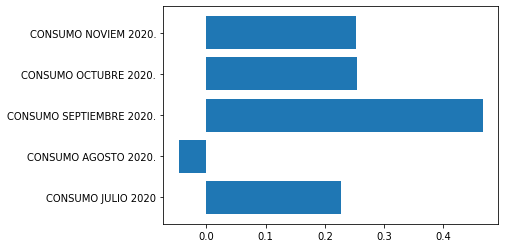

In [ ]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var, importance)
plt.show()

# **Variables más importantes**

In [ ]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [ ]:
important.sort_values(by="importance")

variable  importance
1      CONSUMO AGOSTO 2020.   -0.046929
0        CONSUMO JULIO 2020    0.226872
4      CONSUMO NOVIEM 2020.    0.253028
3     CONSUMO OCTUBRE 2020.    0.254310
2  CONSUMO SEPTIEMBRE 2020.    0.466825

# **Prueba solo usando las variables que hemos conseguido importantes:**


In [ ]:
predictions_LR=LR.predict(features)

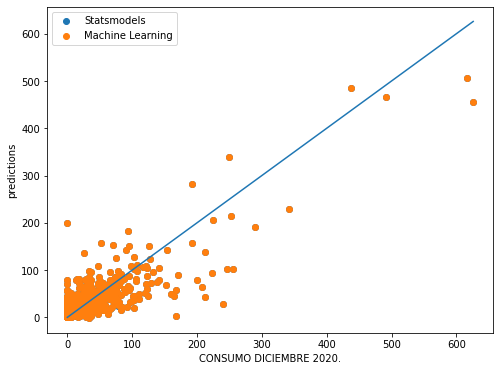

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_SM, label="Statsmodels")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_LR, label="Machine Learning")
u=np.linspace(data["CONSUMO DICIEMBRE 2020."].min(),data["CONSUMO DICIEMBRE 2020."].max(),5)
plt.plot(u,u)
plt.xlabel("CONSUMO DICIEMBRE 2020.")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [ ]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

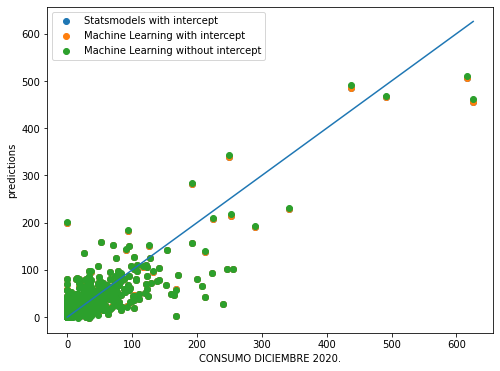

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data["CONSUMO DICIEMBRE 2020."].min(),data["CONSUMO DICIEMBRE 2020."].max(),5)
plt.plot(u,u)
plt.xlabel("CONSUMO DICIEMBRE 2020.")
plt.ylabel("predictions")
plt.legend()
plt.show()

# **Errores de los modelos**

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_SM=r2_score(target,predictions_SM)
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_SM=np.sqrt(mean_squared_error(target,predictions_SM))
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_SM,score_LR,score_LR2],["score_SM","score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2],["RMS2_SM","RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)

score_SM  is  0.7046544663581416
score_LR  is  0.7046543922418571
score_LR2  is  0.7043221739026936
RMS2_SM  is  22.435719640322286
RMS2_LR  is  22.435722455418308
RMS2_LR2  is  22.44833727583196


# **Regresión con Random Forest**

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100)
 
# fit the regressor with x and y data
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [ ]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [ ]:
for i,j in zip([score_SM,score_LR,score_LR2,score_RF],["score_SM","score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_SM","RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_SM  is  0.7046544663581416
score_LR  is  0.7046543922418571
score_LR2  is  0.7043221739026936
score_RF  is  0.9482841274973423
RMS2_SM  is  22.435719640322286
RMS2_LR  is  22.435722455418308
RMS2_LR2  is  22.44833727583196
RMS2_RF  is  9.38829502196906


Mientras el score se acerque más a 1 es mucho mejor el modelo y si el RMS se acerque más a 0 el modelo es mucho mejor, en este caso, el modelo que más cumple con este requisito es el modelo de regresión con random forest, que tiene un score_RF de 0,948 y un RMS_RF  de 9,388.

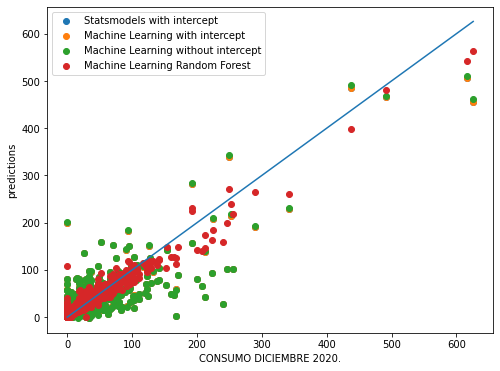

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_LR2, label="Machine Learning without intercept")
plt.scatter(data["CONSUMO DICIEMBRE 2020."],predictions_RF, label="Machine Learning Random Forest")
u=np.linspace(data["CONSUMO DICIEMBRE 2020."].min(),data["CONSUMO DICIEMBRE 2020."].max(),5)
plt.plot(u,u)
plt.xlabel("CONSUMO DICIEMBRE 2020.")
plt.ylabel("predictions")
plt.legend()
plt.show()

El grafico muestra que el ajuste que realiza el modelo de regresión con random forest es mel mejor.

In [ ]:
x_new=np.array([0,1,1,0,1])
regressor.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1.29])

In [ ]:
LR.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.64061216])

In [ ]:
LR2.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.6880485])

Feature: CONSUMO JULIO 2020, Score: 0.15516
Feature: CONSUMO AGOSTO 2020., Score: 0.06170
Feature: CONSUMO SEPTIEMBRE 2020., Score: 0.51438
Feature: CONSUMO OCTUBRE 2020., Score: 0.14447
Feature: CONSUMO NOVIEM 2020., Score: 0.12429


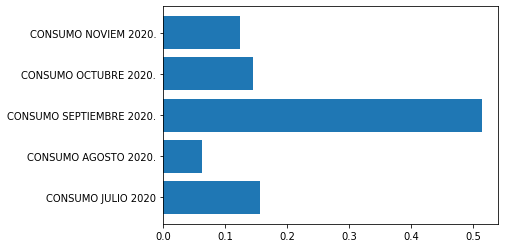

In [ ]:
# get importance
var_RF=regressor.feature_names_in_
importance_RF = regressor.feature_importances_
# summarize feature importance
for i,v in zip(var_RF,importance_RF):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var_RF, importance_RF)
plt.show()

In [ ]:
from sklearn import tree

In [ ]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=800)
tree.plot_tree(regressor.estimators_[0],
               feature_names = X.columns, 
               class_names=["CONSUMO DICIEMBRE 2020."],
               filled = True, fontsize=4)
fig.savefig('rf_individualtree.png')